# ☕ Cafe Rewards Offers Data analysis project 
### Project Scope:
Analyzes data from a Cafe Rewards program to understand customer behavior and offer effectiveness over a 30-day period.

### Questions:

1-How many reward offers were completed?

2-Which offers had the highest completion rate?

3-How many informational offers were followed by transactions?

4-How are customer demographics distributed?

5-Are there any demographic patterns in offer completion?

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
customer = pd.read_csv(r'C:\Users\ramma\Downloads\Linkedin Projects\Completed Projects\Cafe+Rewards+Offers - Python Project\customers.csv')

customer.head()

,customer_id,became_member_on,gender,age,income
0,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN,118,NaN
1,0610b486422d4921ae7d2bf64640c50b,20170715,F,55,112000.0
2,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN,118,NaN
3,78afa995795e4d85b5d9ceeca43f5fef,20170509,F,75,100000.0
4,a03223e636434f42ac4c3df47e8bac43,20170804,NaN,118,NaN


In [3]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       17000 non-null  object 
 1   became_member_on  17000 non-null  int64  
 2   gender            14825 non-null  object 
 3   age               17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


In [4]:
customer['gender'].isna().sum()


np.int64(2175)

In [5]:
customer[customer['gender'].isna()].describe()


,became_member_on,age,income
count,2.175000e+03,2175.0,0.0
mean,2.016804e+07,118.0,NaN
std,1.009105e+04,0.0,NaN
min,2.013080e+07,118.0,NaN
25%,2.016070e+07,118.0,NaN
50%,2.017073e+07,118.0,NaN
75%,2.017123e+07,118.0,NaN
max,2.018073e+07,118.0,NaN


In [6]:
customer[customer['gender'].notnull()].describe()

,became_member_on,age,income
count,1.482500e+04,14825.000000,14825.000000
mean,2.016689e+07,54.393524,65404.991568
std,1.188565e+04,17.383705,21598.299410
min,2.013073e+07,18.000000,30000.000000
25%,2.016052e+07,42.000000,49000.000000
50%,2.017080e+07,55.000000,64000.000000
75%,2.017123e+07,66.000000,80000.000000
max,2.018073e+07,101.000000,120000.000000


In [7]:
customer[customer['age'] == 118][['age', 'gender', 'income']].count()

age       2175
gender       0
income       0
dtype: int64

In [8]:
customer = customer.drop(customer[customer['age'] == 118].index).reset_index(drop=True)
customer

,customer_id,became_member_on,gender,age,income
0,0610b486422d4921ae7d2bf64640c50b,20170715,F,55,112000.0
1,78afa995795e4d85b5d9ceeca43f5fef,20170509,F,75,100000.0
2,e2127556f4f64592b11af22de27a7932,20180426,M,68,70000.0
3,389bc3fa690240e798340f5a15918d5c,20180209,M,65,53000.0
4,2eeac8d8feae4a8cad5a6af0499a211d,20171111,M,58,51000.0
...,...,...,...,...,...
14820,6d5f3a774f3d4714ab0c092238f3a1d7,20180604,F,45,54000.0
14821,2cb4f97358b841b9a9773a7aa05a9d77,20180713,M,61,72000.0
14822,01d26f638c274aa0b965d24cefe3183f,20170126,M,49,73000.0
14823,9dc1421481194dcd9400aec7c9ae6366,20160307,F,83,50000.0


Rows with  were excluded due to missing demographic fields and likely placeholder values. These entries represent anonymous or incomplete profiles

In [9]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14825 entries, 0 to 14824
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       14825 non-null  object 
 1   became_member_on  14825 non-null  int64  
 2   gender            14825 non-null  object 
 3   age               14825 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 579.2+ KB


In [10]:
customer['became_member_on'] = pd.to_datetime(customer['became_member_on'], format='%Y%m%d')

customer

,customer_id,became_member_on,gender,age,income
0,0610b486422d4921ae7d2bf64640c50b,2017-07-15,F,55,112000.0
1,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,F,75,100000.0
2,e2127556f4f64592b11af22de27a7932,2018-04-26,M,68,70000.0
3,389bc3fa690240e798340f5a15918d5c,2018-02-09,M,65,53000.0
4,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,M,58,51000.0
...,...,...,...,...,...
14820,6d5f3a774f3d4714ab0c092238f3a1d7,2018-06-04,F,45,54000.0
14821,2cb4f97358b841b9a9773a7aa05a9d77,2018-07-13,M,61,72000.0
14822,01d26f638c274aa0b965d24cefe3183f,2017-01-26,M,49,73000.0
14823,9dc1421481194dcd9400aec7c9ae6366,2016-03-07,F,83,50000.0


In [11]:
customer.describe() 

,became_member_on,age,income
count,14825,14825.000000,14825.000000
mean,2017-02-18 12:30:15.419898880,54.393524,65404.991568
min,2013-07-29 00:00:00,18.000000,30000.000000
25%,2016-05-20 00:00:00,42.000000,49000.000000
50%,2017-08-02 00:00:00,55.000000,64000.000000
75%,2017-12-30 00:00:00,66.000000,80000.000000
max,2018-07-26 00:00:00,101.000000,120000.000000
std,NaN,17.383705,21598.299410


In [12]:
customer['member_year'] = customer['became_member_on'].dt.year

customer

,customer_id,became_member_on,gender,age,income,member_year
0,0610b486422d4921ae7d2bf64640c50b,2017-07-15,F,55,112000.0,2017
1,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,F,75,100000.0,2017
2,e2127556f4f64592b11af22de27a7932,2018-04-26,M,68,70000.0,2018
3,389bc3fa690240e798340f5a15918d5c,2018-02-09,M,65,53000.0,2018
4,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,M,58,51000.0,2017
...,...,...,...,...,...,...
14820,6d5f3a774f3d4714ab0c092238f3a1d7,2018-06-04,F,45,54000.0,2018
14821,2cb4f97358b841b9a9773a7aa05a9d77,2018-07-13,M,61,72000.0,2018
14822,01d26f638c274aa0b965d24cefe3183f,2017-01-26,M,49,73000.0,2017
14823,9dc1421481194dcd9400aec7c9ae6366,2016-03-07,F,83,50000.0,2016


In [13]:
customer['member_month'] = customer['became_member_on'].dt.month_name()

customer

,customer_id,became_member_on,gender,age,income,member_year,member_month
0,0610b486422d4921ae7d2bf64640c50b,2017-07-15,F,55,112000.0,2017,July
1,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,F,75,100000.0,2017,May
2,e2127556f4f64592b11af22de27a7932,2018-04-26,M,68,70000.0,2018,April
3,389bc3fa690240e798340f5a15918d5c,2018-02-09,M,65,53000.0,2018,February
4,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,M,58,51000.0,2017,November
...,...,...,...,...,...,...,...
14820,6d5f3a774f3d4714ab0c092238f3a1d7,2018-06-04,F,45,54000.0,2018,June
14821,2cb4f97358b841b9a9773a7aa05a9d77,2018-07-13,M,61,72000.0,2018,July
14822,01d26f638c274aa0b965d24cefe3183f,2017-01-26,M,49,73000.0,2017,January
14823,9dc1421481194dcd9400aec7c9ae6366,2016-03-07,F,83,50000.0,2016,March


In [14]:
customer['member_day'] = customer['became_member_on'].dt.day_name()

customer



,customer_id,became_member_on,gender,age,income,member_year,member_month,member_day
0,0610b486422d4921ae7d2bf64640c50b,2017-07-15,F,55,112000.0,2017,July,Saturday
1,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,F,75,100000.0,2017,May,Tuesday
2,e2127556f4f64592b11af22de27a7932,2018-04-26,M,68,70000.0,2018,April,Thursday
3,389bc3fa690240e798340f5a15918d5c,2018-02-09,M,65,53000.0,2018,February,Friday
4,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,M,58,51000.0,2017,November,Saturday
...,...,...,...,...,...,...,...,...
14820,6d5f3a774f3d4714ab0c092238f3a1d7,2018-06-04,F,45,54000.0,2018,June,Monday
14821,2cb4f97358b841b9a9773a7aa05a9d77,2018-07-13,M,61,72000.0,2018,July,Friday
14822,01d26f638c274aa0b965d24cefe3183f,2017-01-26,M,49,73000.0,2017,January,Thursday
14823,9dc1421481194dcd9400aec7c9ae6366,2016-03-07,F,83,50000.0,2016,March,Monday


custmer table cleaned as follwoing:

✅ Removed structurally incomplete rows (age == 118)

✅ Converted raw date integers into proper datetime format

✅ Extracted member_year, member_month, and member_day for segmentation



# ----------------------------------------------------------------------------------

In [15]:
events = pd.read_csv(r'C:\Users\ramma\Downloads\Linkedin Projects\Completed Projects\Cafe+Rewards+Offers - Python Project\events.csv')

events

,customer_id,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714
306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714


In [16]:
# here i relized the value column has max infomation divied by following, so i will divide to two dataframes 

events.groupby('event')['value'].count().reset_index()

,event,value
0,offer completed,33579
1,offer received,76277
2,offer viewed,57725
3,transaction,138953


In [17]:
# extract transaction events

events_transaction = events[events['event'] == 'transaction'].reset_index(drop=True)


events_transaction

,customer_id,event,value,time
0,02c083884c7d45b39cc68e1314fec56c,transaction,{'amount': 0.8300000000000001},0
1,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,transaction,{'amount': 34.56},0
2,54890f68699049c2a04d415abc25e717,transaction,{'amount': 13.23},0
3,b2f1cd155b864803ad8334cdf13c4bd2,transaction,{'amount': 19.51},0
4,fe97aa22dd3e48c8b143116a8403dd52,transaction,{'amount': 18.97},0
...,...,...,...,...
138948,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714
138949,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714
138950,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714
138951,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714


In [18]:
# Extract offer-related events: Received, Viewed, Completed

events_RCV = events[events['event'].isin(['offer completed', 'offer received', 'offer viewed'])].reset_index(drop=True)

events_RCV


,customer_id,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
...,...,...,...,...
167576,a6f84f4e976f44508c358cc9aba6d2b3,offer completed,{'offer_id': '2298d6c36e964ae4a3e7e9706d1fb8c2...,714
167577,b895c57e8cd047a8872ce02aa54759d6,offer completed,{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...,714
167578,8dda575c2a1d44b9ac8e8b07b93d1f8e,offer viewed,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},714
167579,8431c16f8e1d440880db371a68f82dd0,offer completed,{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...,714


In [19]:
## here i will change value column name in both new dataframes to offerId and amount  

## and trim extra things as well 


## then import the last dataframe 

In [20]:
# chnage the name of column (value) in events_RCV  to offer_id


events_RCV.rename(columns={'value': 'offer_id'}, inplace=True)

events_RCV

,customer_id,event,offer_id,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
...,...,...,...,...
167576,a6f84f4e976f44508c358cc9aba6d2b3,offer completed,{'offer_id': '2298d6c36e964ae4a3e7e9706d1fb8c2...,714
167577,b895c57e8cd047a8872ce02aa54759d6,offer completed,{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...,714
167578,8dda575c2a1d44b9ac8e8b07b93d1f8e,offer viewed,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},714
167579,8431c16f8e1d440880db371a68f82dd0,offer completed,{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...,714


In [21]:
events_RCV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167581 entries, 0 to 167580
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   customer_id  167581 non-null  object
 1   event        167581 non-null  object
 2   offer_id     167581 non-null  object
 3   time         167581 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 5.1+ MB


In [22]:
id = events_RCV['offer_id'].str.split("'").str[3]


id 

0         9b98b8c7a33c4b65b9aebfe6a799e6d9
1         0b1e1539f2cc45b7b9fa7c272da2e1d7
2         2906b810c7d4411798c6938adc9daaa5
3         fafdcd668e3743c1bb461111dcafc2a4
4         4d5c57ea9a6940dd891ad53e9dbe8da0
                        ...               
167576    2298d6c36e964ae4a3e7e9706d1fb8c2
167577    fafdcd668e3743c1bb461111dcafc2a4
167578    0b1e1539f2cc45b7b9fa7c272da2e1d7
167579    fafdcd668e3743c1bb461111dcafc2a4
167580    fafdcd668e3743c1bb461111dcafc2a4
Name: offer_id, Length: 167581, dtype: object

In [23]:
events_RCV['offer_id'] = id

events_RCV

,customer_id,event,offer_id,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,9b98b8c7a33c4b65b9aebfe6a799e6d9,0
1,a03223e636434f42ac4c3df47e8bac43,offer received,0b1e1539f2cc45b7b9fa7c272da2e1d7,0
2,e2127556f4f64592b11af22de27a7932,offer received,2906b810c7d4411798c6938adc9daaa5,0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,fafdcd668e3743c1bb461111dcafc2a4,0
4,68617ca6246f4fbc85e91a2a49552598,offer received,4d5c57ea9a6940dd891ad53e9dbe8da0,0
...,...,...,...,...
167576,a6f84f4e976f44508c358cc9aba6d2b3,offer completed,2298d6c36e964ae4a3e7e9706d1fb8c2,714
167577,b895c57e8cd047a8872ce02aa54759d6,offer completed,fafdcd668e3743c1bb461111dcafc2a4,714
167578,8dda575c2a1d44b9ac8e8b07b93d1f8e,offer viewed,0b1e1539f2cc45b7b9fa7c272da2e1d7,714
167579,8431c16f8e1d440880db371a68f82dd0,offer completed,fafdcd668e3743c1bb461111dcafc2a4,714


In [24]:
# change the name of dataframe events_transaction value column to amount
events_transaction.rename(columns={'value': 'amount'}, inplace=True)

events_transaction

,customer_id,event,amount,time
0,02c083884c7d45b39cc68e1314fec56c,transaction,{'amount': 0.8300000000000001},0
1,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,transaction,{'amount': 34.56},0
2,54890f68699049c2a04d415abc25e717,transaction,{'amount': 13.23},0
3,b2f1cd155b864803ad8334cdf13c4bd2,transaction,{'amount': 19.51},0
4,fe97aa22dd3e48c8b143116a8403dd52,transaction,{'amount': 18.97},0
...,...,...,...,...
138948,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714
138949,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714
138950,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714
138951,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714


In [25]:
events_transaction['amount'] = events_transaction['amount'].str.extract(r"'amount':\s*([\d\.]+)").astype(float)



In [26]:
events_transaction

,customer_id,event,amount,time
0,02c083884c7d45b39cc68e1314fec56c,transaction,0.83,0
1,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,transaction,34.56,0
2,54890f68699049c2a04d415abc25e717,transaction,13.23,0
3,b2f1cd155b864803ad8334cdf13c4bd2,transaction,19.51,0
4,fe97aa22dd3e48c8b143116a8403dd52,transaction,18.97,0
...,...,...,...,...
138948,b3a1272bc9904337b331bf348c3e8c17,transaction,1.59,714
138949,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,9.53,714
138950,a00058cf10334a308c68e7631c529907,transaction,3.61,714
138951,76ddbd6576844afe811f1a3c0fbb5bec,transaction,3.53,714


In [27]:
events_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138953 entries, 0 to 138952
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   customer_id  138953 non-null  object 
 1   event        138953 non-null  object 
 2   amount       138953 non-null  float64
 3   time         138953 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [28]:
offers = pd.read_csv(r'C:\Users\ramma\Downloads\Linkedin Projects\Completed Projects\Cafe+Rewards+Offers - Python Project\offers.csv')

offers

,offer_id,offer_type,difficulty,reward,duration,channels
0,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,10,7,"['email', 'mobile', 'social']"
1,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10,10,5,"['web', 'email', 'mobile', 'social']"
2,3f207df678b143eea3cee63160fa8bed,informational,0,0,4,"['web', 'email', 'mobile']"
3,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5,5,7,"['web', 'email', 'mobile']"
4,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,20,5,10,"['web', 'email']"
5,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,7,3,7,"['web', 'email', 'mobile', 'social']"
6,fafdcd668e3743c1bb461111dcafc2a4,discount,10,2,10,"['web', 'email', 'mobile', 'social']"
7,5a8bc65990b245e5a138643cd4eb9837,informational,0,0,3,"['email', 'mobile', 'social']"
8,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5,5,5,"['web', 'email', 'mobile', 'social']"
9,2906b810c7d4411798c6938adc9daaa5,discount,10,2,7,"['web', 'email', 'mobile']"


In [29]:
offers.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   offer_id    10 non-null     object
 1   offer_type  10 non-null     object
 2   difficulty  10 non-null     int64 
 3   reward      10 non-null     int64 
 4   duration    10 non-null     int64 
 5   channels    10 non-null     object
dtypes: int64(3), object(3)
memory usage: 612.0+ bytes


In [30]:
merged_offers_events_RCV = pd.merge(events_RCV, offers, how='left', left_on='offer_id', right_on='offer_id')

merged_offers_events_RCV

,customer_id,event,offer_id,time,offer_type,difficulty,reward,duration,channels
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,bogo,5,5,7,"['web', 'email', 'mobile']"
1,a03223e636434f42ac4c3df47e8bac43,offer received,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,discount,20,5,10,"['web', 'email']"
2,e2127556f4f64592b11af22de27a7932,offer received,2906b810c7d4411798c6938adc9daaa5,0,discount,10,2,7,"['web', 'email', 'mobile']"
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,fafdcd668e3743c1bb461111dcafc2a4,0,discount,10,2,10,"['web', 'email', 'mobile', 'social']"
4,68617ca6246f4fbc85e91a2a49552598,offer received,4d5c57ea9a6940dd891ad53e9dbe8da0,0,bogo,10,10,5,"['web', 'email', 'mobile', 'social']"
...,...,...,...,...,...,...,...,...,...
167576,a6f84f4e976f44508c358cc9aba6d2b3,offer completed,2298d6c36e964ae4a3e7e9706d1fb8c2,714,discount,7,3,7,"['web', 'email', 'mobile', 'social']"
167577,b895c57e8cd047a8872ce02aa54759d6,offer completed,fafdcd668e3743c1bb461111dcafc2a4,714,discount,10,2,10,"['web', 'email', 'mobile', 'social']"
167578,8dda575c2a1d44b9ac8e8b07b93d1f8e,offer viewed,0b1e1539f2cc45b7b9fa7c272da2e1d7,714,discount,20,5,10,"['web', 'email']"
167579,8431c16f8e1d440880db371a68f82dd0,offer completed,fafdcd668e3743c1bb461111dcafc2a4,714,discount,10,2,10,"['web', 'email', 'mobile', 'social']"


In [31]:
merged_offers_events_RCV.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167581 entries, 0 to 167580
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   customer_id  167581 non-null  object
 1   event        167581 non-null  object
 2   offer_id     167581 non-null  object
 3   time         167581 non-null  int64 
 4   offer_type   167581 non-null  object
 5   difficulty   167581 non-null  int64 
 6   reward       167581 non-null  int64 
 7   duration     167581 non-null  int64 
 8   channels     167581 non-null  object
dtypes: int64(4), object(5)
memory usage: 11.5+ MB


In [32]:
transaction_with_customer = events_transaction.merge(customer, how='left', on='customer_id')

transaction_with_customer

,customer_id,event,amount,time,became_member_on,gender,age,income,member_year,member_month,member_day
0,02c083884c7d45b39cc68e1314fec56c,transaction,0.83,0,2016-07-11,F,20.0,30000.0,2016.0,July,Monday
1,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,transaction,34.56,0,2016-01-17,M,42.0,96000.0,2016.0,January,Sunday
2,54890f68699049c2a04d415abc25e717,transaction,13.23,0,2017-12-28,M,36.0,56000.0,2017.0,December,Thursday
3,b2f1cd155b864803ad8334cdf13c4bd2,transaction,19.51,0,2017-10-16,F,55.0,94000.0,2017.0,October,Monday
4,fe97aa22dd3e48c8b143116a8403dd52,transaction,18.97,0,2017-12-17,F,39.0,67000.0,2017.0,December,Sunday
...,...,...,...,...,...,...,...,...,...,...,...
138948,b3a1272bc9904337b331bf348c3e8c17,transaction,1.59,714,2018-01-01,M,66.0,47000.0,2018.0,January,Monday
138949,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,9.53,714,2018-04-08,M,52.0,62000.0,2018.0,April,Sunday
138950,a00058cf10334a308c68e7631c529907,transaction,3.61,714,2013-09-22,F,63.0,52000.0,2013.0,September,Sunday
138951,76ddbd6576844afe811f1a3c0fbb5bec,transaction,3.53,714,2016-07-09,M,57.0,40000.0,2016.0,July,Saturday


In [33]:
transaction_with_customer.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138953 entries, 0 to 138952
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   customer_id       138953 non-null  object        
 1   event             138953 non-null  object        
 2   amount            138953 non-null  float64       
 3   time              138953 non-null  int64         
 4   became_member_on  123957 non-null  datetime64[ns]
 5   gender            123957 non-null  object        
 6   age               123957 non-null  float64       
 7   income            123957 non-null  float64       
 8   member_year       123957 non-null  float64       
 9   member_month      123957 non-null  object        
 10  member_day        123957 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(5)
memory usage: 11.7+ MB


In [34]:
offer_customer = merged_offers_events_RCV
transaction_customer = transaction_with_customer

In [35]:
offer_customer

,customer_id,event,offer_id,time,offer_type,difficulty,reward,duration,channels
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,bogo,5,5,7,"['web', 'email', 'mobile']"
1,a03223e636434f42ac4c3df47e8bac43,offer received,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,discount,20,5,10,"['web', 'email']"
2,e2127556f4f64592b11af22de27a7932,offer received,2906b810c7d4411798c6938adc9daaa5,0,discount,10,2,7,"['web', 'email', 'mobile']"
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,fafdcd668e3743c1bb461111dcafc2a4,0,discount,10,2,10,"['web', 'email', 'mobile', 'social']"
4,68617ca6246f4fbc85e91a2a49552598,offer received,4d5c57ea9a6940dd891ad53e9dbe8da0,0,bogo,10,10,5,"['web', 'email', 'mobile', 'social']"
...,...,...,...,...,...,...,...,...,...
167576,a6f84f4e976f44508c358cc9aba6d2b3,offer completed,2298d6c36e964ae4a3e7e9706d1fb8c2,714,discount,7,3,7,"['web', 'email', 'mobile', 'social']"
167577,b895c57e8cd047a8872ce02aa54759d6,offer completed,fafdcd668e3743c1bb461111dcafc2a4,714,discount,10,2,10,"['web', 'email', 'mobile', 'social']"
167578,8dda575c2a1d44b9ac8e8b07b93d1f8e,offer viewed,0b1e1539f2cc45b7b9fa7c272da2e1d7,714,discount,20,5,10,"['web', 'email']"
167579,8431c16f8e1d440880db371a68f82dd0,offer completed,fafdcd668e3743c1bb461111dcafc2a4,714,discount,10,2,10,"['web', 'email', 'mobile', 'social']"


In [36]:
transaction_customer

,customer_id,event,amount,time,became_member_on,gender,age,income,member_year,member_month,member_day
0,02c083884c7d45b39cc68e1314fec56c,transaction,0.83,0,2016-07-11,F,20.0,30000.0,2016.0,July,Monday
1,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,transaction,34.56,0,2016-01-17,M,42.0,96000.0,2016.0,January,Sunday
2,54890f68699049c2a04d415abc25e717,transaction,13.23,0,2017-12-28,M,36.0,56000.0,2017.0,December,Thursday
3,b2f1cd155b864803ad8334cdf13c4bd2,transaction,19.51,0,2017-10-16,F,55.0,94000.0,2017.0,October,Monday
4,fe97aa22dd3e48c8b143116a8403dd52,transaction,18.97,0,2017-12-17,F,39.0,67000.0,2017.0,December,Sunday
...,...,...,...,...,...,...,...,...,...,...,...
138948,b3a1272bc9904337b331bf348c3e8c17,transaction,1.59,714,2018-01-01,M,66.0,47000.0,2018.0,January,Monday
138949,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,9.53,714,2018-04-08,M,52.0,62000.0,2018.0,April,Sunday
138950,a00058cf10334a308c68e7631c529907,transaction,3.61,714,2013-09-22,F,63.0,52000.0,2013.0,September,Sunday
138951,76ddbd6576844afe811f1a3c0fbb5bec,transaction,3.53,714,2016-07-09,M,57.0,40000.0,2016.0,July,Saturday


In [37]:
transaction_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138953 entries, 0 to 138952
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   customer_id       138953 non-null  object        
 1   event             138953 non-null  object        
 2   amount            138953 non-null  float64       
 3   time              138953 non-null  int64         
 4   became_member_on  123957 non-null  datetime64[ns]
 5   gender            123957 non-null  object        
 6   age               123957 non-null  float64       
 7   income            123957 non-null  float64       
 8   member_year       123957 non-null  float64       
 9   member_month      123957 non-null  object        
 10  member_day        123957 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(5)
memory usage: 11.7+ MB


In [38]:
transaction_customer.dropna(inplace=True)
transaction_customer.reset_index(drop=True, inplace=True)

transaction_customer

,customer_id,event,amount,time,became_member_on,gender,age,income,member_year,member_month,member_day
0,02c083884c7d45b39cc68e1314fec56c,transaction,0.83,0,2016-07-11,F,20.0,30000.0,2016.0,July,Monday
1,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,transaction,34.56,0,2016-01-17,M,42.0,96000.0,2016.0,January,Sunday
2,54890f68699049c2a04d415abc25e717,transaction,13.23,0,2017-12-28,M,36.0,56000.0,2017.0,December,Thursday
3,b2f1cd155b864803ad8334cdf13c4bd2,transaction,19.51,0,2017-10-16,F,55.0,94000.0,2017.0,October,Monday
4,fe97aa22dd3e48c8b143116a8403dd52,transaction,18.97,0,2017-12-17,F,39.0,67000.0,2017.0,December,Sunday
...,...,...,...,...,...,...,...,...,...,...,...
123952,24f56b5e1849462093931b164eb803b5,transaction,22.64,714,2017-12-28,F,48.0,80000.0,2017.0,December,Thursday
123953,b3a1272bc9904337b331bf348c3e8c17,transaction,1.59,714,2018-01-01,M,66.0,47000.0,2018.0,January,Monday
123954,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,9.53,714,2018-04-08,M,52.0,62000.0,2018.0,April,Sunday
123955,a00058cf10334a308c68e7631c529907,transaction,3.61,714,2013-09-22,F,63.0,52000.0,2013.0,September,Sunday


# Data analysis section 

## 1. How many reward offers were completed?
### Filter and count:


In [39]:
reward_completed = offer_customer[(offer_customer['event'] == 'offer completed') & (offer_customer['offer_type'] != 'informational')]

reward_completed_count = reward_completed.shape[0]

In [40]:
# the number of completed rewards   
reward_completed_count

33579

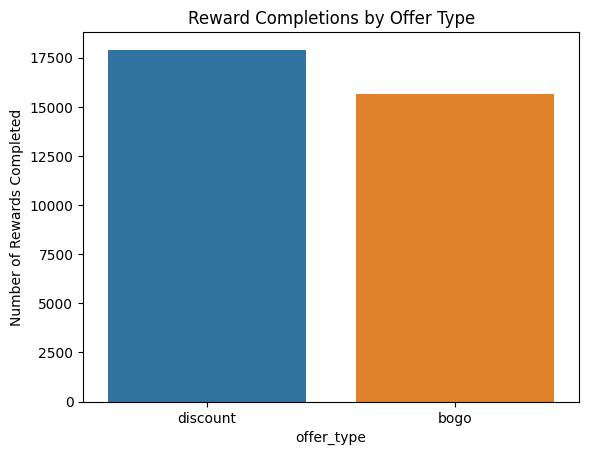

In [41]:
# visualizations of reward completions by offer type

sns.countplot(data=reward_completed, x='offer_type', hue='offer_type')
plt.ylabel('Number of Rewards Completed')
plt.title('Reward Completions by Offer Type');


## 2. Which offers had the highest completion rate?
### Calculate completion rate:


In [55]:
# here filter and save to variables 
received = offer_customer[offer_customer['event'] == 'offer received']
completed = offer_customer[offer_customer['event'] == 'offer completed']

# here count the received and completed offers by offer_id
received_count = received.groupby('offer_id').size().reset_index(name='received_count')
completed_count = completed.groupby('offer_id').size().reset_index(name='completed_count')

# merge received and completed counts
offer_stats = received_count.merge(completed_count, how='left', on='offer_id')
offer_stats['completed_count'] = offer_stats['completed_count'].fillna(0)

# calculate completion rate
offer_stats['completion_rate'] = offer_stats['completed_count'] / offer_stats['received_count']

offer_stats.sort_values(by='completion_rate', ascending=False).reset_index(drop=True)  

,offer_id,received_count,completed_count,completion_rate
0,fafdcd668e3743c1bb461111dcafc2a4,7597,5317.0,0.699882
1,2298d6c36e964ae4a3e7e9706d1fb8c2,7646,5156.0,0.674340
2,f19421c1d4aa40978ebb69ca19b0e20d,7571,4296.0,0.567428
3,9b98b8c7a33c4b65b9aebfe6a799e6d9,7677,4354.0,0.567149
4,2906b810c7d4411798c6938adc9daaa5,7632,4017.0,0.526336
5,ae264e3637204a6fb9bb56bc8210ddfd,7658,3688.0,0.481588
6,0b1e1539f2cc45b7b9fa7c272da2e1d7,7668,3420.0,0.446009
7,4d5c57ea9a6940dd891ad53e9dbe8da0,7593,3331.0,0.438694
8,5a8bc65990b245e5a138643cd4eb9837,7618,0.0,0.000000
9,3f207df678b143eea3cee63160fa8bed,7617,0.0,0.000000


<Axes: xlabel='completion_rate', ylabel='offer_id'>

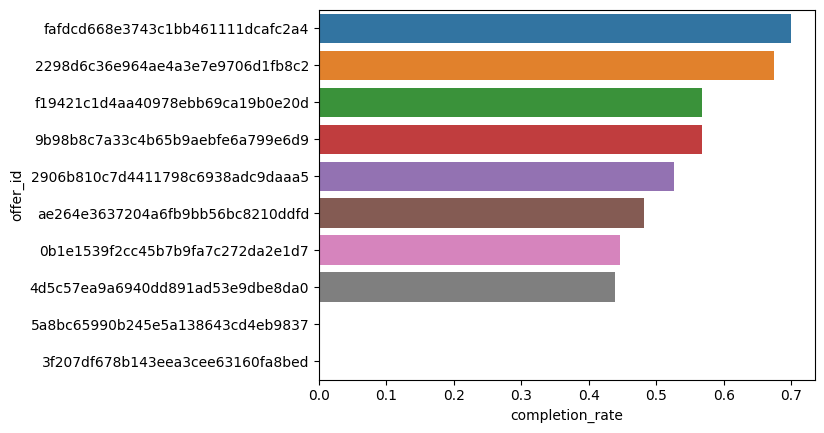

In [43]:
# Visualize top performers:


top_offers = offer_stats.sort_values(by='completion_rate', ascending=False).reset_index(drop=True)

sns.barplot(data =top_offers, x='completion_rate', y='offer_id', hue='offer_id')



#### Completion Rate by Offer Type: Evaluating Strategic Performance Across BOGO, Discount, and Informational Campaigns

In [44]:
# here filter and save to variables 
received2 = offer_customer[offer_customer['event'] == 'offer received']
completed2 = offer_customer[offer_customer['event'] == 'offer completed']

# here count the received and completed offers by offer_type
received_count2 = received2.groupby('offer_type').size().reset_index(name='received_count2')
completed_count2 = completed2.groupby('offer_type').size().reset_index(name='completed_count2')

# merge received and completed counts
offer_stats2 = received_count2.merge(completed_count2, how='left', on='offer_type')
offer_stats2['completed_count2'] = offer_stats2['completed_count2'].fillna(0)

# calculate completion rate
offer_stats2['completion_rate'] = offer_stats2['completed_count2'] / offer_stats2['received_count2']

offer_stats2

,offer_type,received_count2,completed_count2,completion_rate
0,bogo,30499,15669.0,0.513755
1,discount,30543,17910.0,0.586386
2,informational,15235,0.0,0.000000


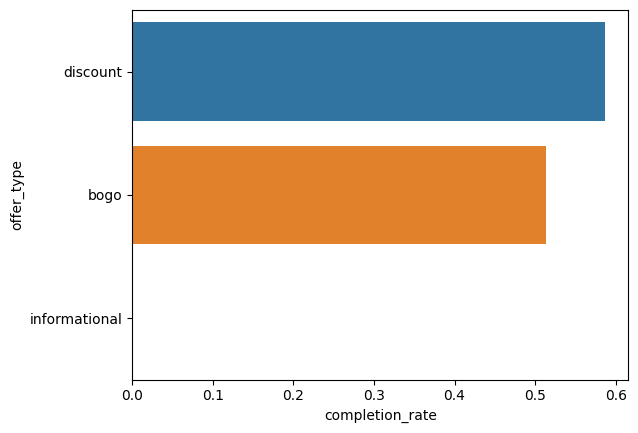

In [45]:
# Visualize top performers:


top_offers2 = offer_stats2.sort_values(by='completion_rate', ascending=False).reset_index(drop=True)

sns.barplot(data =top_offers2, x='completion_rate', y='offer_type', hue='offer_type');


## 3. How many informational offers were followed by transactions?
### Filter and merge:


In [57]:
info_views = offer_customer[(offer_customer['event'] == 'offer viewed') & (offer_customer['offer_type'] == 'informational')]

info_followups = info_views.merge(transaction_customer, on='customer_id')

info_followups = info_followups[info_followups['time_y'] > info_followups['time_x']]

info_followups_count = info_followups['offer_id'].nunique()

info_followups_count


2

## 4. How are customer demographics distributed?
### Visualize age, income, gender:


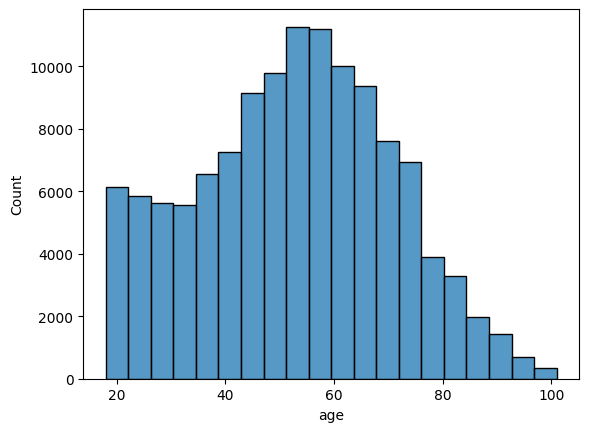

In [48]:
# Age distribution of customers

sns.histplot(transaction_customer['age'], bins=20);


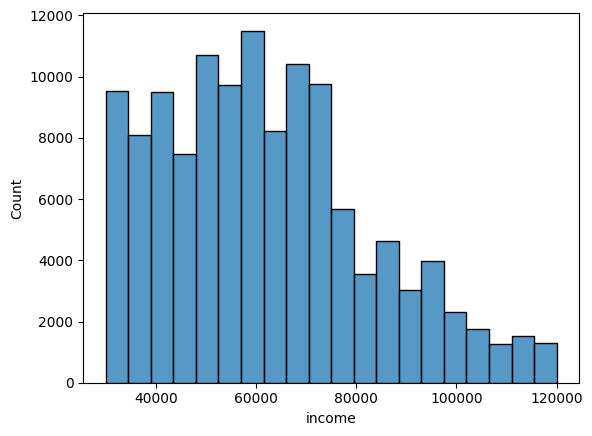

In [49]:
# income distribution of customers

sns.histplot(transaction_customer['income'], bins=20);

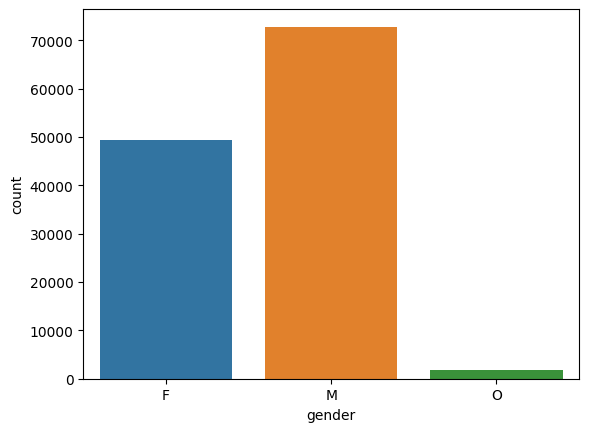

In [50]:
# gender distribution of customers

sns.countplot(data=transaction_customer, x='gender', hue='gender');

## 5. Are there any demographic patterns in offer completion?
### Create demographic bins:


In [89]:
completed_demo3 = offer_customer.merge(customer[['customer_id', 'age', 'gender', 'income']], on='customer_id', how='left')

In [90]:
completed_demo3.head()

,customer_id,event,offer_id,time,offer_type,difficulty,reward,duration,channels,age,gender,income
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,bogo,5,5,7,"['web', 'email', 'mobile']",75.0,F,100000.0
1,a03223e636434f42ac4c3df47e8bac43,offer received,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,discount,20,5,10,"['web', 'email']",NaN,NaN,NaN
2,e2127556f4f64592b11af22de27a7932,offer received,2906b810c7d4411798c6938adc9daaa5,0,discount,10,2,7,"['web', 'email', 'mobile']",68.0,M,70000.0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,fafdcd668e3743c1bb461111dcafc2a4,0,discount,10,2,10,"['web', 'email', 'mobile', 'social']",NaN,NaN,NaN
4,68617ca6246f4fbc85e91a2a49552598,offer received,4d5c57ea9a6940dd891ad53e9dbe8da0,0,bogo,10,10,5,"['web', 'email', 'mobile', 'social']",NaN,NaN,NaN


In [91]:
# Demographic Bins

completed_demo3['age_group'] = pd.cut(completed_demo3['age'], bins=[0, 30, 50, 70, 100], labels=['<30', '30-50', '50-70', '70+'])
completed_demo3['income_group'] = pd.cut(completed_demo3['income'], bins=[0, 40000, 80000, 120000], labels=['Low', 'Mid', 'High'])

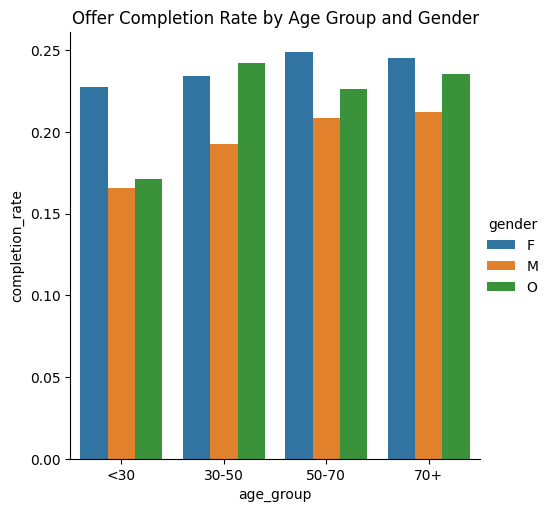

In [98]:
# Visualize

sns.catplot(data=demo_completed3, x='age_group', y='completion_rate', hue='gender', kind='bar') 
plt.title('Offer Completion Rate by Age Group and Gender');